# Морозко Иван. Группа 23.М07

# Задача 3. Сравнение методов классификации

Сделано всё:
* Самостоятельно реализовать один из методов классификации, с возможностью настройки гиперпараметров.

* Взять данные для предсказания заболеваний сердца тут (целевой признак для предсказания --- target). Демо блокнот с анализом этих данных можно найти тут.

* Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning).

* Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.

* При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).

* Используя подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания от Вашей реализации на выделенной заранее тестовой выборке.

* Повторить предыдущий пункт для библиотечных реализаций (например, из sklearn) всех пройденных методов классификации (logistic regression, svm, knn, naive bayes, decision tree).

* Сравнить все обученные модели, построить их confusion matrices. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.

* (+2 балла) Реализовать еще один из методов классификации и добавить его в сравнение.

* (+3 балла) Найти данные, на которых интересно будет решать задачу классификации. Повторить все пункты задания на новых данных.


# Датасет

В качестве первого датасета возьмём данные о заболеваниях сердца.
Вторым датасетом будет выступать пицевая ценность продуктов, использованная в заданиях 1 и 2.

Описание датасета:

* Age - age in years
* Sex - (1 = male; 0 = female)
* Cp - chest pain type
* Trestbps - resting blood pressure (in mm Hg on admission to the hospital)
* Chol - serum cholestoral in mg/dl
* Fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* Restecg - resting electrocardiographic results
* Thalach - maximum heart rate achieved
* Exang - exercise induced angina (1 = yes; 0 = no)
* Oldpeak - ST depression induced by exercise relative to rest
* Slope - the slope of the peak exercise ST segment
* Ca - number of major vessels (0-3) colored by flourosopy
* Thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
* Target - have disease or not (1=yes, 0=no)

Необходимо решить задачу классификации и научиться предсказывать целовой **бинарный** признак target имеет ли пациент заболевание сердца.

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

%precision %.4f

df = pd.read_csv("drive/MyDrive/Colab Notebooks/heart.csv")

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Анализ (EDA)

Анализ данных, начальные выводы

## Целевой признак

In [62]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

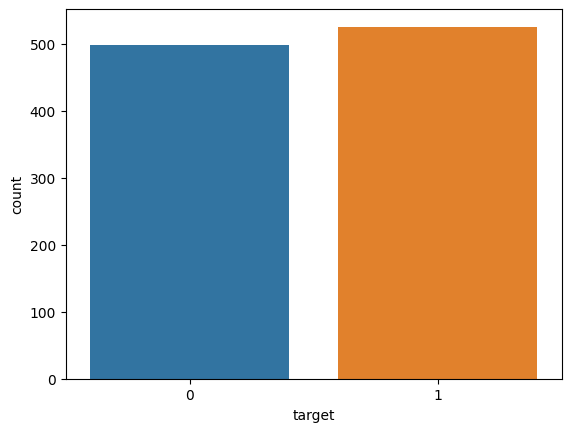

In [63]:
sns.countplot(x="target", data=df)
plt.show()

## Признак _пол_

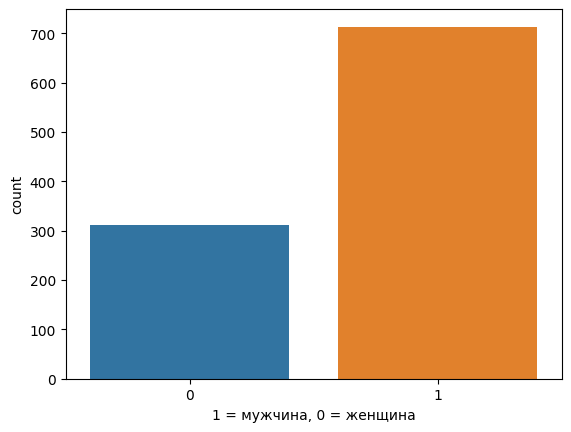

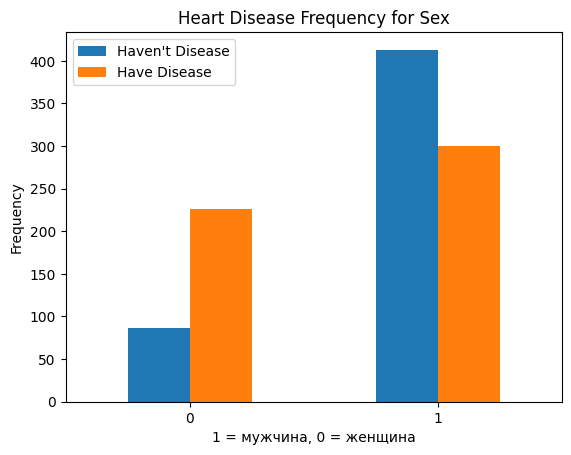

In [64]:
sns.countplot(x='sex', data=df)
plt.xlabel("1 = мужчина, 0 = женщина")
plt.show()

pd.crosstab(df.sex,df.target).plot(kind="bar")
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('1 = мужчина, 0 = женщина')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

Женщины вероятнее подвержены заболеваниям сердца.

## Признак _возраст_

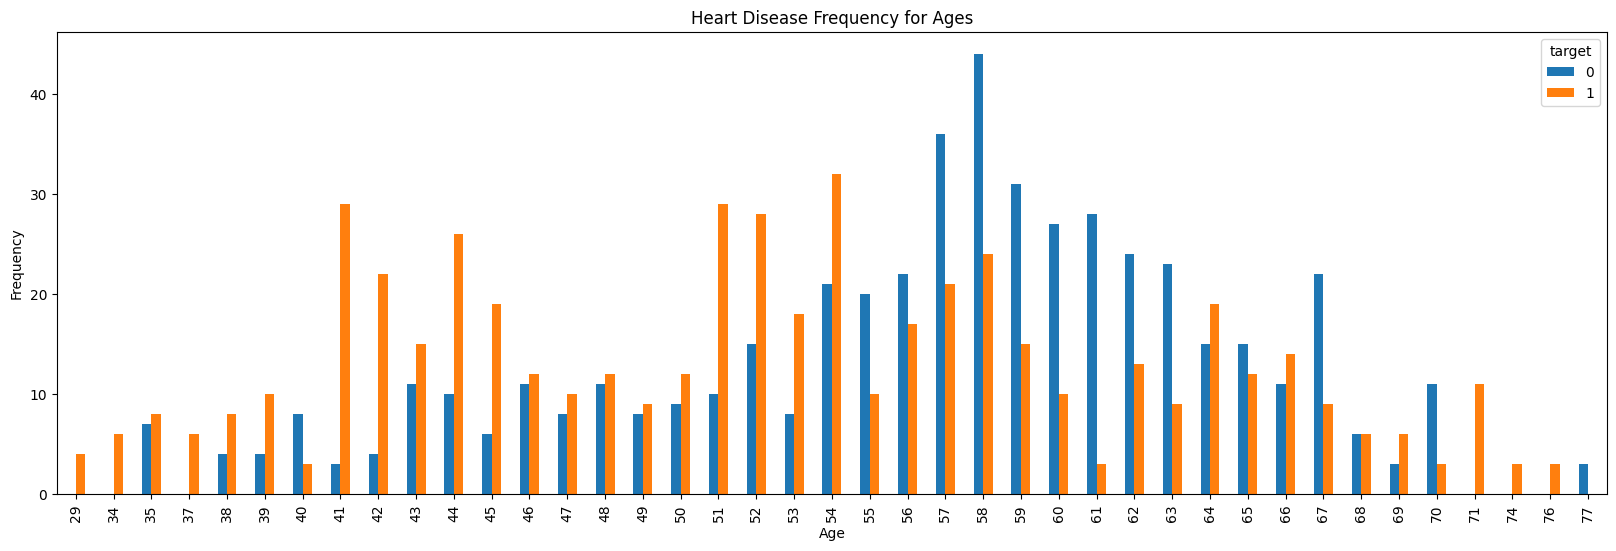

In [65]:
pd.crosstab(df.age,df.target).plot(kind="bar", figsize=(20, 6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



## Признак _heart rate_

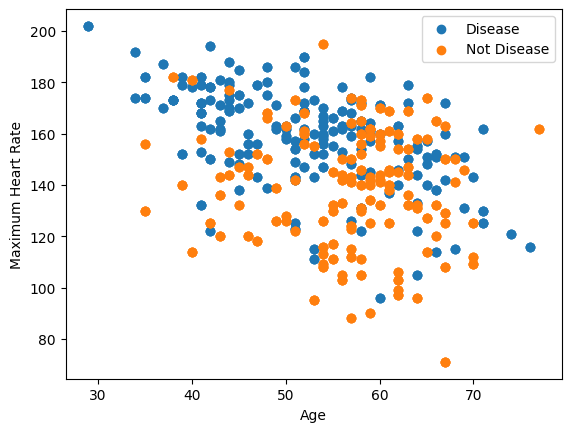

In [66]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)])
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

## Признак _Slope_

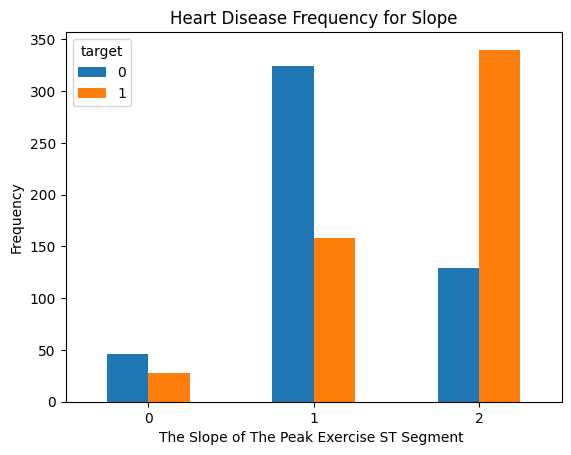

In [67]:
pd.crosstab(df.slope,df.target).plot(kind="bar")
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()



## Признак _fasting blood sugar_

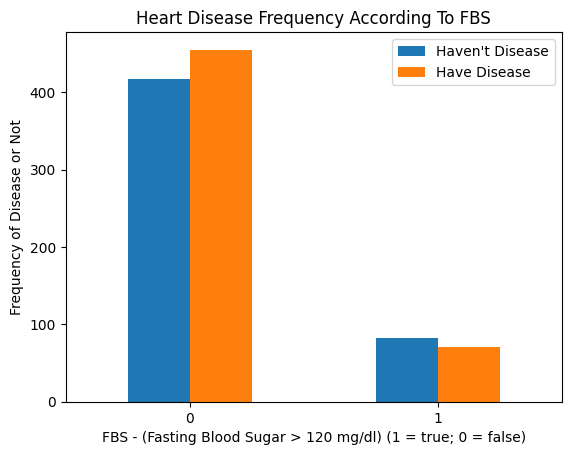

In [68]:
pd.crosstab(df.fbs,df.target).plot(kind="bar")
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()



## Признак _chest pain type_

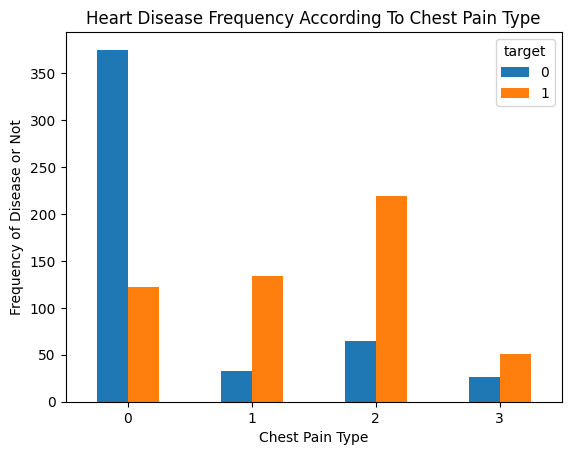

In [69]:
pd.crosstab(df.cp,df.target).plot(kind="bar")
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()



# Feature Engineering

Преобразуем категориальные признаки _cp_, _thal_ и _slope_ через кодирование:

In [70]:
cp_dum = pd.get_dummies(df['cp'], prefix = "cp")
thal_dum = pd.get_dummies(df['thal'], prefix = "thal")
slope_dum = pd.get_dummies(df['slope'], prefix = "slope")

frames = [df, cp_dum, thal_dum, slope_dum]
df = pd.concat(frames, axis = 1)
df = df.drop(columns = ['cp', 'chol', 'thal', 'slope'])
df.head()

,age,sex,trestbps,fbs,restecg,thalach,exang,oldpeak,ca,target,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,0,1,168,0,1.0,2,0,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,1,0,155,1,3.1,0,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,0,1,125,1,2.6,0,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,0,1,161,0,0.0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,1,1,106,0,1.9,3,0,...,0,0,0,0,0,1,0,0,1,0


# Разбиение и масштабирование данных

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y = df['target']
X = df.drop(columns=['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
X_train.head()

,age,sex,trestbps,fbs,restecg,thalach,exang,oldpeak,ca,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,-1.481117,0.650566,-1.117672,-0.425115,0.931131,1.285426,-0.696311,-0.899374,-0.729676,-0.968428,-0.41792,1.586805,-0.301032,-0.054074,-0.27429,0.946059,-0.815505,-0.261793,-0.932314,1.060113
1,0.394729,0.650566,-0.378854,-0.425115,0.931131,-0.272293,-0.696311,-0.549171,3.041003,-0.968428,2.39280,-0.630197,-0.301032,-0.054074,-0.27429,-1.057017,1.226234,-0.261793,1.072600,-0.943296
2,-0.488022,0.650566,1.041951,-0.425115,-0.992832,-0.984393,-0.696311,1.376947,-0.729676,1.032601,-0.41792,-0.630197,-0.301032,-0.054074,-0.27429,-1.057017,1.226234,-0.261793,1.072600,-0.943296
3,-0.267335,0.650566,0.132636,-0.425115,0.931131,0.350795,-0.696311,-0.198968,0.212994,-0.968428,2.39280,-0.630197,-0.301032,-0.054074,-0.27429,0.946059,-0.815505,-0.261793,-0.932314,1.060113
4,-0.267335,0.650566,1.155616,2.352304,0.931131,1.240920,-0.696311,0.151236,-0.729676,-0.968428,-0.41792,-0.630197,3.321910,-0.054074,-0.27429,-1.057017,1.226234,-0.261793,1.072600,-0.943296


# Подобор наилучшего количества признаков, используя Recursive Feature Elimination

In [72]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import RidgeClassifierCV

rfecv = RFECV(estimator=RidgeClassifierCV())

rfecv.fit(X_train, y_train)

selected_features = list(X_train.columns[rfecv.support_])
print("Optimal features: ", rfecv.n_features_)
print("Selected features: ", selected_features)

X_train = X_train[selected_features]
X_test = X_test[selected_features]

X_train.head()

Optimal features:  11
Selected features:  ['sex', 'trestbps', 'thalach', 'exang', 'oldpeak', 'ca', 'cp_0', 'thal_0', 'thal_2', 'thal_3', 'slope_1']


,sex,trestbps,thalach,exang,oldpeak,ca,cp_0,thal_0,thal_2,thal_3,slope_1
0,0.650566,-1.117672,1.285426,-0.696311,-0.899374,-0.729676,-0.968428,-0.054074,0.946059,-0.815505,-0.932314
1,0.650566,-0.378854,-0.272293,-0.696311,-0.549171,3.041003,-0.968428,-0.054074,-1.057017,1.226234,1.072600
2,0.650566,1.041951,-0.984393,-0.696311,1.376947,-0.729676,1.032601,-0.054074,-1.057017,1.226234,1.072600
3,0.650566,0.132636,0.350795,-0.696311,-0.198968,0.212994,-0.968428,-0.054074,0.946059,-0.815505,-0.932314
4,0.650566,1.155616,1.240920,-0.696311,0.151236,-0.729676,-0.968428,-0.054074,-1.057017,1.226234,1.072600


# Реализация метода классификации KNN

In [73]:
class KNearestNeighborsClassifier:
    def __init__(self, k=5):
        self.k_neighbors = k
        self.predictions = []

    def _calculate_distance(self, point, dataset):
        dists = []
        for data_point in dataset:
            dists.append(np.linalg.norm(data_point - point))
        return np.array(dists)

    def _find_nearest_neighbors(self, dists, labels):
        neighbors = np.column_stack([dists, labels])
        sorted_neighbors = neighbors[neighbors[:, 0].argsort()]

        most_common_label = self._determine_label(sorted_neighbors[:self.k_neighbors])
        return most_common_label

    def _determine_label(self, nearest_neighbors):
        labels, counts = np.unique(nearest_neighbors[:, 1], return_counts=True)
        return labels[np.argmax(counts)]

    def train(self, X_train, X_test, y_train):
        for test_point in X_test:
            distances = self._calculate_distance(test_point, X_train)
            self.predictions.append(self._find_nearest_neighbors(distances, y_train))
        return self

    def evaluate_accuracy(self, y_true):
        correct_predictions = sum(1 for i in range(len(y_true)) if y_true[i] == self.predictions[i])
        return correct_predictions / len(y_true)

    def get_parameters(self):
        return {"k_neighbors": self.k_neighbors}

    def update_parameters(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

In [74]:
knn = KNearestNeighborsClassifier(3)

knn_fit = knn.train(X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy())
knn_fit.predictions[:10]

[1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0]

In [75]:
y_test[:10]

527    1
359    1
447    0
31     1
621    0
590    1
905    0
737    0
76     1
948    0
Name: target, dtype: int64

## Точность предсказания

In [76]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, knn_fit.predictions)

0.9380530973451328

# Кросс-Валидация


In [77]:
from sklearn.model_selection import KFold

combined_data = np.vstack([X_train, X_test])
combined_target = np.concatenate([y_train, y_test])
full_dataset = np.column_stack([combined_data, combined_target])

results_df = pd.DataFrame({'#':['neighbor-count', 'score-accuracy']})

cross_validation = KFold(n_splits=5, shuffle=True, random_state=1)
neighbor_values = [3, 5, 7, 9]
fold_counter = 1

optimal_accuracy = 0
optimal_neighbors = 0
optimal_fold = 0

for neighbors in neighbor_values:
    fold_counter = 1
    for train_index, test_index in cross_validation.split(full_dataset):
        classifier = KNearestNeighborsClassifier(neighbors)
        trained_classifier = classifier.train(full_dataset[train_index],
                                              full_dataset[test_index],
                                              full_dataset[:, -1:][train_index])
        accuracy_score = classifier.evaluate_accuracy(full_dataset[:, -1:][test_index])
        results_df[f"Fold-{fold_counter}.{neighbors}"] = [neighbors, accuracy_score]
        if accuracy_score > optimal_accuracy:
            optimal_accuracy = accuracy_score
            optimal_neighbors = neighbors
            optimal_fold = fold_counter
        fold_counter += 1

print(f'Best accuracy of {optimal_accuracy:.4f} achieved with {optimal_neighbors} neighbors on fold {optimal_fold}')

Best accuracy of 0.9805 achieved with 3 neighbors on fold 2


# Библиотечные реализации

Используется библиотека `sklearn`


## LogisticRegression

In [78]:
from sklearn.linear_model import LogisticRegression
accuracies = {}

lr = LogisticRegression()
lr.fit(X_train, y_train)
acc = lr.score(X_test, y_test)

accuracies['Logistic Regression'] = acc
print("Accuracy: {:.4f}".format(acc))

Accuracy: 0.8466


## SVM

In [79]:
from sklearn.svm import SVC

svm = SVC(random_state = 12)
svm.fit(X_train, y_train)

acc = svm.score(X_test, y_test)
accuracies['SVM'] = acc
print("Accuracy: {:.4f}".format(acc))

Accuracy: 0.8761


## KNeighborsClassifier

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print("Accuracy (k = {}): {:.4f}".format(3, knn.score(X_test, y_test)))

Accuracy (k = 3): 0.9381


## naive_bayes

In [81]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

acc = nb.score(X_test, y_test)
accuracies['Naive Bayes'] = acc
print("Accuracy: {:.4f}".format(acc))

Accuracy: 0.6224


## DecisionTreeClassifier

In [82]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

acc = dtc.score(X_test, y_test)
accuracies['Decision Tree'] = acc
print("Accuracy: {:.4f}".format(acc))

Accuracy: 0.9823


# Confusion Matrices

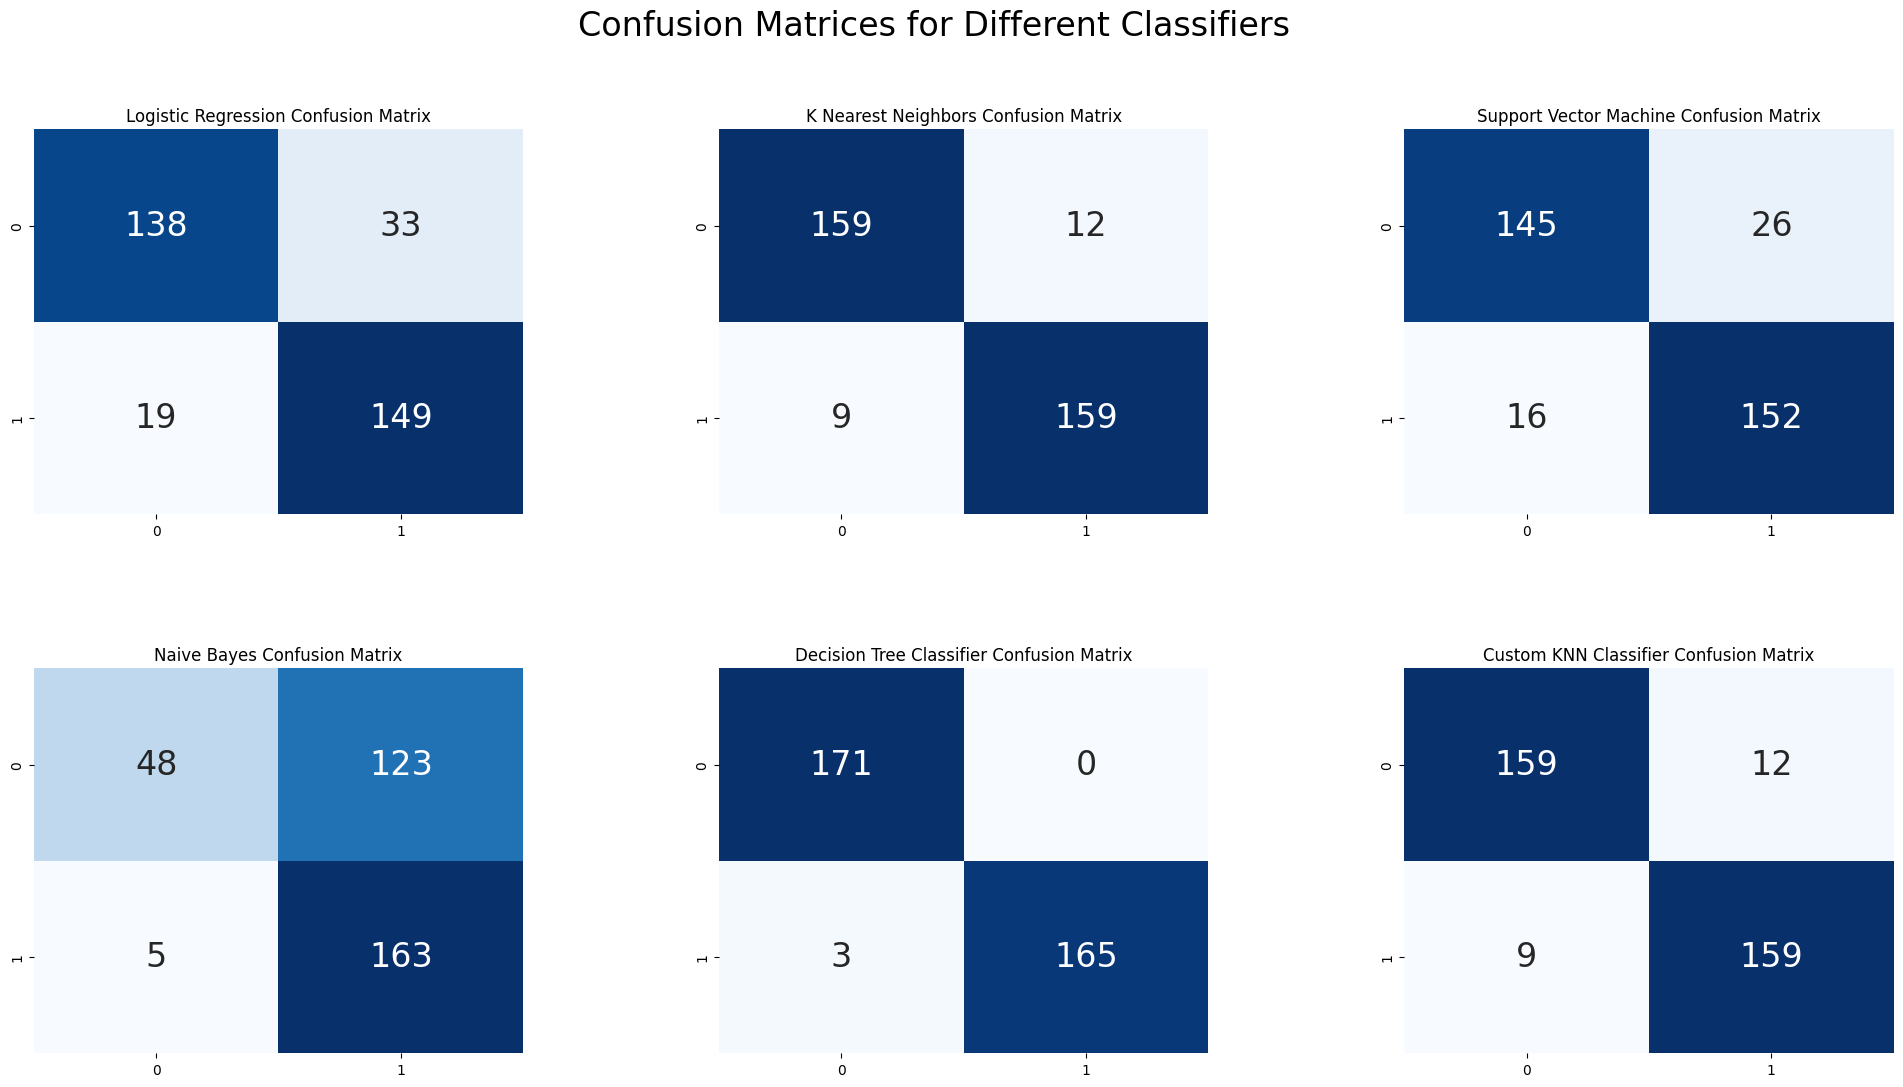

In [83]:
from sklearn.metrics import confusion_matrix

logistic_reg = LogisticRegression()
knn_3neighbors = KNeighborsClassifier(n_neighbors=3)
svm_classifier = SVC()
naive_bayes_classifier = GaussianNB()
decision_tree_classifier = DecisionTreeClassifier()
custom_knn = KNearestNeighborsClassifier(3)

logistic_reg.fit(X_train, y_train)
predictions_lr = logistic_reg.predict(X_test)

knn_3neighbors.fit(X_train, y_train)
predictions_knn = knn_3neighbors.predict(X_test)

svm_classifier.fit(X_train, y_train)
predictions_svm = svm_classifier.predict(X_test)

naive_bayes_classifier.fit(X_train, y_train)
predictions_nb = naive_bayes_classifier.predict(X_test)

decision_tree_classifier.fit(X_train, y_train)
predictions_dtc = decision_tree_classifier.predict(X_test)

custom_knn.train(X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy())
predictions_custom_knn = custom_knn.predictions

conf_matrix_lr = confusion_matrix(y_test, predictions_lr)
conf_matrix_knn = confusion_matrix(y_test, predictions_knn)
conf_matrix_svm = confusion_matrix(y_test, predictions_svm)
conf_matrix_nb = confusion_matrix(y_test, predictions_nb)
conf_matrix_dtc = confusion_matrix(y_test, predictions_dtc)
conf_matrix_custom_knn = confusion_matrix(y_test, predictions_custom_knn)

plt.figure(figsize=(24, 12))
plt.suptitle("Confusion Matrices for Different Classifiers", fontsize=24)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

titles = ["Logistic Regression", "K Nearest Neighbors", "Support Vector Machine",
          "Naive Bayes", "Decision Tree Classifier", "Custom KNN Classifier"]
conf_matrices = [conf_matrix_lr, conf_matrix_knn, conf_matrix_svm, conf_matrix_nb, conf_matrix_dtc, conf_matrix_custom_knn]

for i, (title, matrix) in enumerate(zip(titles, conf_matrices), 1):
    plt.subplot(2, 3, i)
    plt.title(f"{title} Confusion Matrix")
    sns.heatmap(matrix, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

plt.show()

# Результаты

Матрица реализованного решения (KNN) в правом нижнем углу идентична матрице KNN библиотечного решения.

Decision Tree Classifier показал себя лучше всего.

# Реализация ещё одного метода классификации (Logistic Regression)

(686,)


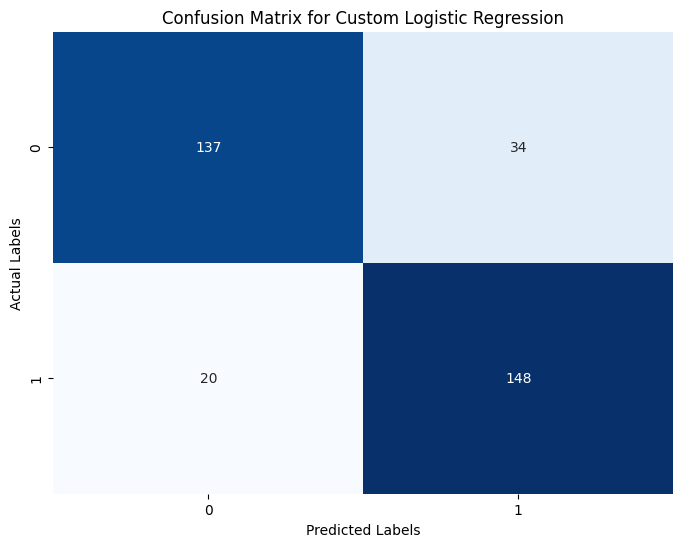

Training Accuracy: 0.8746355685131195
Test Accuracy: 0.8407079646017699


In [84]:
class CustomLogisticRegression:

    def __init__(self, iterations=100, learningRate=0.01):
        self.weights = None
        self.bias = 0.1
        self.iterations = iterations
        self.learning_rate = learningRate

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.random.uniform(0, 1, num_features)

        for _ in range(self.iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self._sigmoid(linear_model)
            loss = self._mean_squared_loss(predictions, y)
            grad_weights = np.dot((predictions - y).T, X) / num_features
            grad_bias = np.mean(predictions - y)
            self.weights -= self.learning_rate * grad_weights
            self.bias -= self.learning_rate * grad_bias

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _mean_squared_loss(self, predictions, actual):
        return np.mean((predictions - actual) ** 2)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        probabilities = self._sigmoid(linear_output)
        return np.where(probabilities >= 0.5, 1, 0)

custom_lr = CustomLogisticRegression(10000, 0.01)
custom_lr.fit(X_train.to_numpy(), y_train.to_numpy())

train_predictions = custom_lr.predict(X_train)
test_predictions = custom_lr.predict(X_test)

print(train_predictions.shape)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

conf_matrix = confusion_matrix(y_test, test_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix for Custom Logistic Regression")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

## Результаты

Confusion Matrix почти полностью совпадает с библиотечной релизацией

# Классификация на собственном датасете

Возьмём датасет из моей предыдущей работы про пищевую ценность продуктов

Будем предсказывать категориальный признак _Protein Category_ (Low, Medium, High)

In [96]:
df = pd.read_csv("drive/MyDrive/Colab Notebooks/cleaned_data.csv")
df

,Shrt_Desc,Protein,Protein Category,Energ_Kcal,Carbohydrt,Water,Fatty_Acids,Cholestrl,Ash,Phosphorus,Zinc,Fiber_TD,Sugar_Tot,Vit_B
0,Other,850.0,Low,717,60.0,15870.0,75432.0,215.0,2110.0,24.0,0.09,0.0,60.0,19.00017
1,Other,490.0,Low,718,2870.0,16720.0,68595.0,225.0,1620.0,24.0,0.05,0.0,60.0,19.00607
2,Other,280.0,Low,876,0.0,240.0,94350.0,256.0,0.0,3.0,0.01,0.0,0.0,22.32001
3,Other,21400.0,High,353,2340.0,42410.0,27247.0,75.0,5110.0,387.0,2.66,0.0,500.0,18.79522
4,Other,23240.0,High,371,2790.0,41110.0,28146.0,94.0,3180.0,451.0,2.60,0.0,510.0,16.27726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,Other,18500.0,Medium,305,0.0,43000.0,21678.0,95.0,13400.0,254.0,1.10,0.0,0.0,105.56200
8786,Other,20540.0,High,111,5410.0,70250.0,522.0,41.0,2970.0,426.0,1.55,0.0,0.0,112.33215
8787,Other,0.0,Low,269,73140.0,26000.0,0.0,0.0,860.0,8.0,0.19,0.0,73200.0,0.29000
8788,Other,16100.0,Medium,90,2000.0,79200.0,872.0,50.0,1300.0,272.0,1.00,0.0,0.0,66.67250


Избавимся от лишних колонок Shrt_Desc, Sugar_Tot и Protein

In [97]:
df.drop(columns = ['Shrt_Desc', 'Sugar_Tot', 'Protein'], inplace=True)
df

,Protein Category,Energ_Kcal,Carbohydrt,Water,Fatty_Acids,Cholestrl,Ash,Phosphorus,Zinc,Fiber_TD,Vit_B
0,Low,717,60.0,15870.0,75432.0,215.0,2110.0,24.0,0.09,0.0,19.00017
1,Low,718,2870.0,16720.0,68595.0,225.0,1620.0,24.0,0.05,0.0,19.00607
2,Low,876,0.0,240.0,94350.0,256.0,0.0,3.0,0.01,0.0,22.32001
3,High,353,2340.0,42410.0,27247.0,75.0,5110.0,387.0,2.66,0.0,18.79522
4,High,371,2790.0,41110.0,28146.0,94.0,3180.0,451.0,2.60,0.0,16.27726
...,...,...,...,...,...,...,...,...,...,...,...
8785,Medium,305,0.0,43000.0,21678.0,95.0,13400.0,254.0,1.10,0.0,105.56200
8786,High,111,5410.0,70250.0,522.0,41.0,2970.0,426.0,1.55,0.0,112.33215
8787,Low,269,73140.0,26000.0,0.0,0.0,860.0,8.0,0.19,0.0,0.29000
8788,Medium,90,2000.0,79200.0,872.0,50.0,1300.0,272.0,1.00,0.0,66.67250


Поскольку категориальный признак сейчас является строкой, закодируем его числом:


*   Low -> 0
*   Medium -> 1
*   High -> 1



<Axes: xlabel='Protein Category', ylabel='count'>

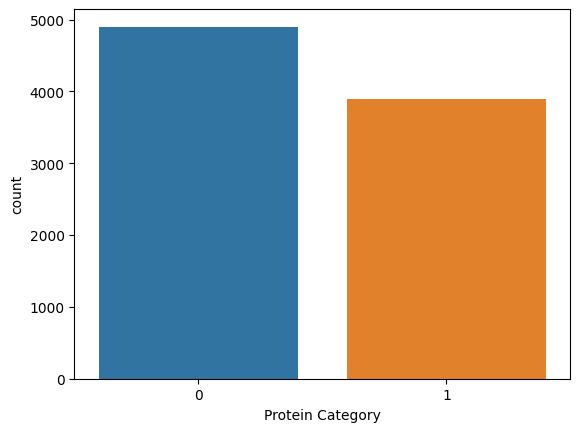

In [98]:
df['Protein Category'] = df['Protein Category'].replace({'Low': 0, 'Medium': 1, 'High': 1})

sns.countplot(x='Protein Category', data=df)

## Разбиение и масштабирование данных

In [99]:
y = df['Protein Category']
X = df.drop(columns=['Protein Category'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
X_train.head(5)

,Energ_Kcal,Carbohydrt,Water,Fatty_Acids,Cholestrl,Ash,Phosphorus,Zinc,Fiber_TD,Vit_B
0,-0.283716,-0.214947,0.235224,-0.403043,0.003242,-0.169849,-0.128677,-0.424555,-0.311960,0.442548
1,-0.560694,-0.820113,0.493496,-0.002734,0.271341,-0.088305,0.342552,-0.462919,-0.524199,-0.416606
2,0.111125,-0.820113,0.291539,0.337368,0.301130,-0.379983,-0.232843,-0.164860,-0.524199,0.491238
3,0.771158,1.091317,-0.908555,0.257087,0.142256,0.021467,-0.252684,-0.513087,-0.359125,-0.492899
4,-1.091077,-0.426647,1.146621,-0.686536,-0.393941,-0.543072,-0.793357,-0.631131,-0.500617,-0.498208


## Отбор признаков

In [101]:
rfecv = RFECV(estimator=RidgeClassifierCV())

rfecv.fit(X_train, y_train)

selected_features = list(X_train.columns[rfecv.support_])
print("Optimal features: ", rfecv.n_features_)
print("Selected features: ", selected_features)
X_train = X_train[selected_features]
X_test = X_test[selected_features]

Optimal features:  4
Selected features:  ['Energ_Kcal', 'Carbohydrt', 'Water', 'Fatty_Acids']


In [102]:
knn = KNearestNeighborsClassifier(3)

knn_fit = knn.train(X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy())
accuracy_score(y_test, knn_fit.predictions)

0.9482936918304034

Заметна хорошая точность

## Библиотечные реализации

In [104]:
from sklearn.linear_model import LogisticRegression
accuracies = {}

lr = LogisticRegression()
lr.fit(X_train, y_train)
acc = lr.score(X_test, y_test)

accuracies['Logistic Regression'] = acc
print("Accuracy: {:.4f}".format(acc))

Accuracy: 0.9614


In [105]:
from sklearn.svm import SVC

svm = SVC(random_state = 12)
svm.fit(X_train, y_train)

acc = svm.score(X_test, y_test)
accuracies['SVM'] = acc
print("Accuracy: {:.4f}".format(acc))

Accuracy: 0.9552


In [106]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print("Accuracy (k = {}): {:.4f}".format(3, knn.score(X_test, y_test)))

Accuracy (k = 3): 0.9483


In [107]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

acc = nb.score(X_test, y_test)
accuracies['Naive Bayes'] = acc
print("Accuracy: {:.4f}".format(acc))

Accuracy: 0.8673


In [108]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

acc = dtc.score(X_test, y_test)
accuracies['Decision Tree'] = acc
print("Accuracy: {:.4f}".format(acc))

Accuracy: 0.9345


## Confusion Matrices

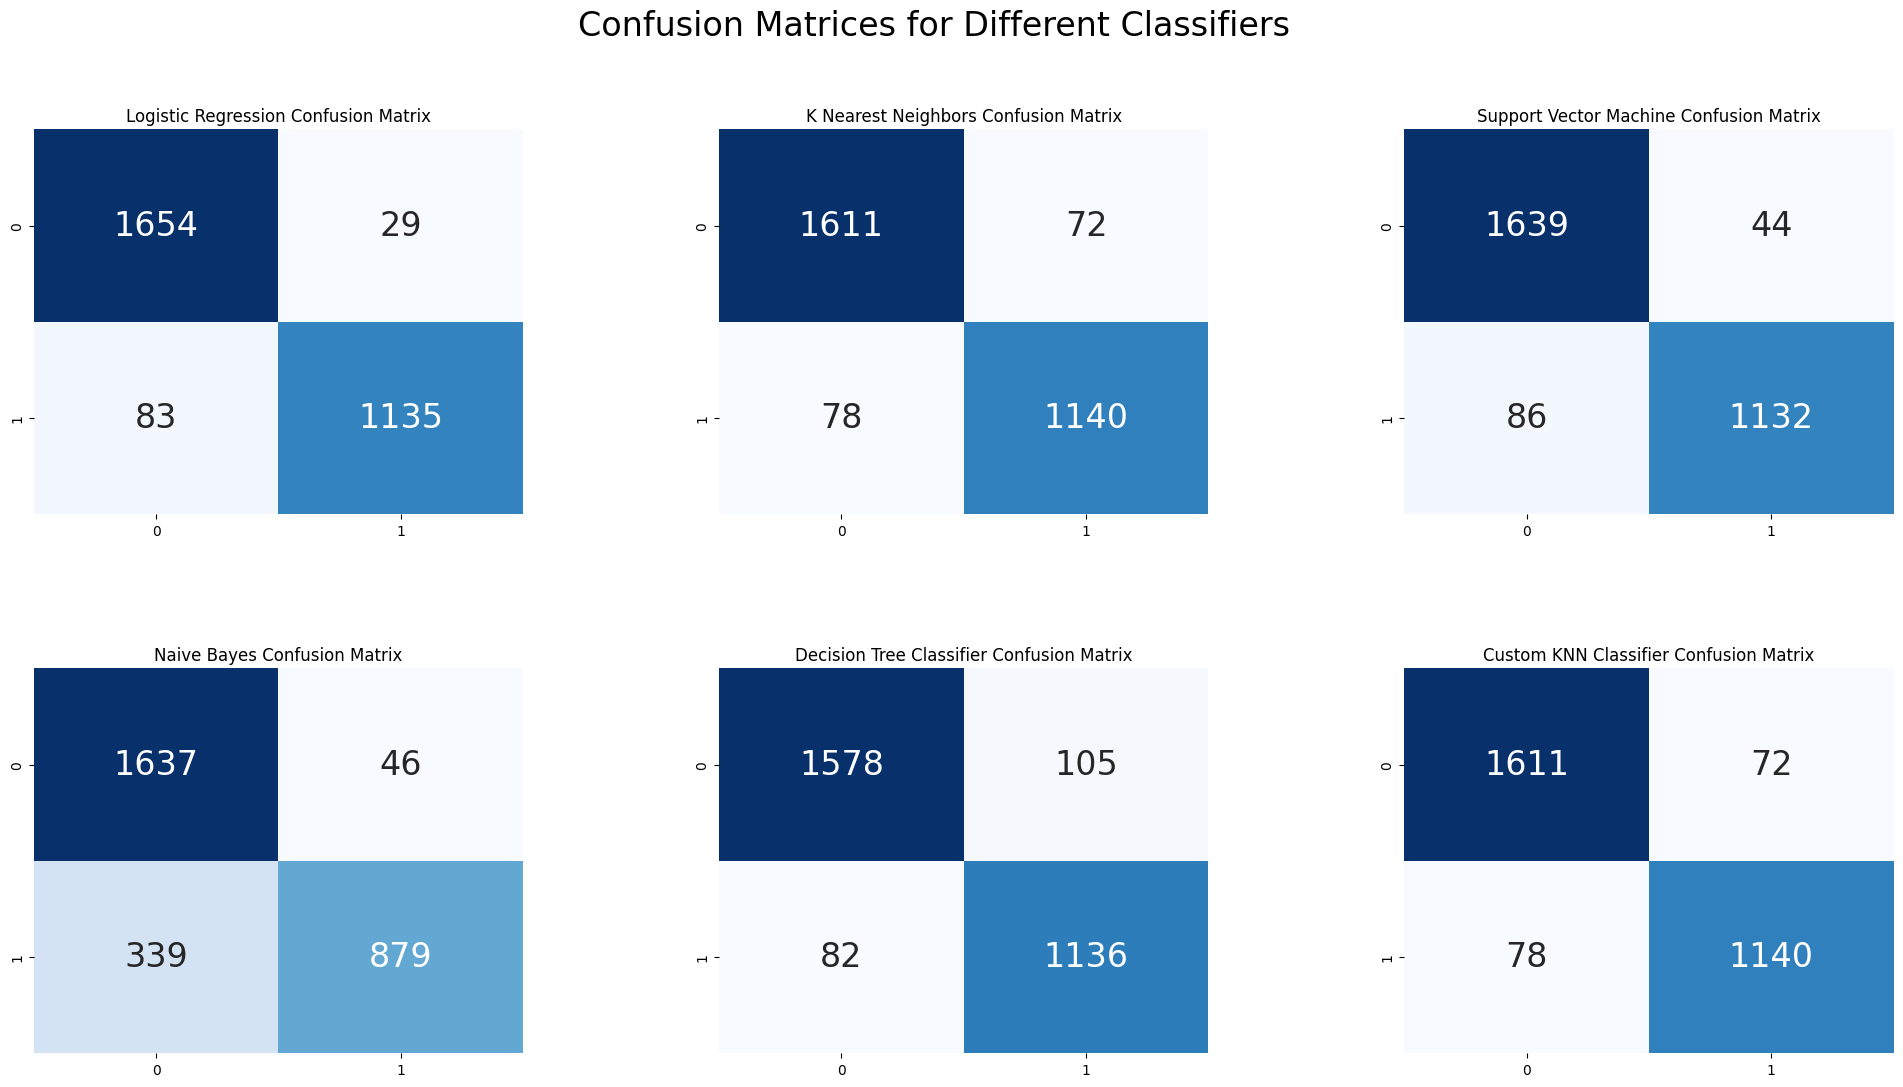

In [109]:
logistic_reg = LogisticRegression()
knn_3neighbors = KNeighborsClassifier(n_neighbors=3)
svm_classifier = SVC()
naive_bayes_classifier = GaussianNB()
decision_tree_classifier = DecisionTreeClassifier()
custom_knn = KNearestNeighborsClassifier(3)

logistic_reg.fit(X_train, y_train)
predictions_lr = logistic_reg.predict(X_test)

knn_3neighbors.fit(X_train, y_train)
predictions_knn = knn_3neighbors.predict(X_test)

svm_classifier.fit(X_train, y_train)
predictions_svm = svm_classifier.predict(X_test)

naive_bayes_classifier.fit(X_train, y_train)
predictions_nb = naive_bayes_classifier.predict(X_test)

decision_tree_classifier.fit(X_train, y_train)
predictions_dtc = decision_tree_classifier.predict(X_test)

custom_knn.train(X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy())
predictions_custom_knn = custom_knn.predictions

conf_matrix_lr = confusion_matrix(y_test, predictions_lr)
conf_matrix_knn = confusion_matrix(y_test, predictions_knn)
conf_matrix_svm = confusion_matrix(y_test, predictions_svm)
conf_matrix_nb = confusion_matrix(y_test, predictions_nb)
conf_matrix_dtc = confusion_matrix(y_test, predictions_dtc)
conf_matrix_custom_knn = confusion_matrix(y_test, predictions_custom_knn)

plt.figure(figsize=(24, 12))
plt.suptitle("Confusion Matrices for Different Classifiers", fontsize=24)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

titles = ["Logistic Regression", "K Nearest Neighbors", "Support Vector Machine",
          "Naive Bayes", "Decision Tree Classifier", "Custom KNN Classifier"]
conf_matrices = [conf_matrix_lr, conf_matrix_knn, conf_matrix_svm, conf_matrix_nb, conf_matrix_dtc, conf_matrix_custom_knn]

for i, (title, matrix) in enumerate(zip(titles, conf_matrices), 1):
    plt.subplot(2, 3, i)
    plt.title(f"{title} Confusion Matrix")
    sns.heatmap(matrix, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

plt.show()

## Результаты

Logistic regression модель показала себя лучше всего.

Реализованная KNN модель совпадает по результатам с библиотечной

## Ещё один метод (LogicticRegression)

(5889,)


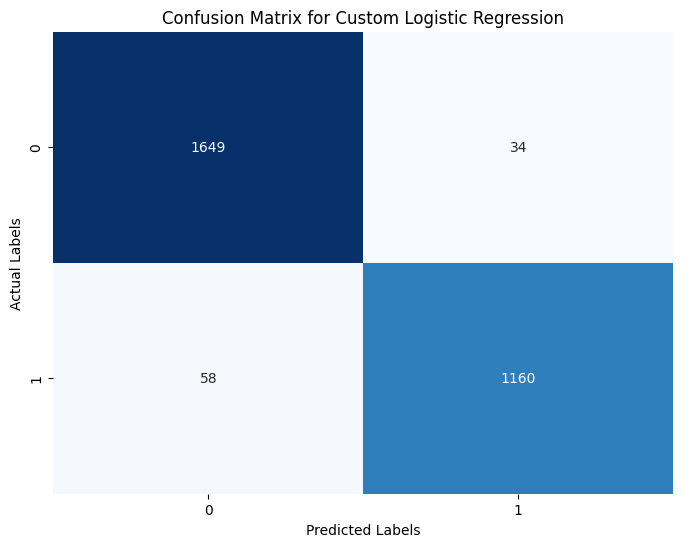

Training Accuracy: 0.9583970113771438
Test Accuracy: 0.9682867976559807


In [110]:
custom_lr = CustomLogisticRegression(10000, 0.01)
custom_lr.fit(X_train.to_numpy(), y_train.to_numpy())

train_predictions = custom_lr.predict(X_train)
test_predictions = custom_lr.predict(X_test)

print(train_predictions.shape)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

conf_matrix = confusion_matrix(y_test, test_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix for Custom Logistic Regression")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Собственная реализация показывает точность почти такую же, как и библиотечная